# 🎓 Student Performance Prediction
This notebook analyzes student performance data and applies machine learning techniques to predict outcomes based on demographic and academic factors.

##  Importing Libraries

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import joblib

## Loading the Dataset

In [600]:
df = pd.read_csv("xAPI-Edu-Data.csv")

## Initial Data Exploration

In [602]:
df.shape

(480, 17)

In [603]:
df.sample()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
92,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,50.0,70.0,19.0,15,Yes,Good,Under-7,H


In [604]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M


## Exploratory Data Analysis & Preprocessing

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 248 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               349 non-null    float64
 10  VisITedResources          422 non-null    float64
 11  AnnouncementsView         422 non-null    float64
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [607]:
df.isnull().sum()

gender                        0
NationalITy                   0
PlaceofBirth                  0
StageID                       0
GradeID                       0
SectionID                   232
Topic                         0
Semester                      0
Relation                      0
raisedhands                 131
VisITedResources             58
AnnouncementsView            58
Discussion                    0
ParentAnsweringSurvey         0
ParentschoolSatisfaction      0
StudentAbsenceDays            0
Class                         0
dtype: int64

In [608]:
cols = ["SectionID", "raisedhands", "VisITedResources", "AnnouncementsView"]

for col in cols:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [609]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [610]:
cols_numeric = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[cols_numeric].quantile(0.25)
Q3 = df[cols_numeric].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[cols_numeric] < (Q1 - 1.5 * IQR)) | (df[cols_numeric] > (Q3 + 1.5 * IQR)))
outliers.sum()/df.shape[0]

raisedhands          0.0
VisITedResources     0.0
AnnouncementsView    0.0
Discussion           0.0
dtype: float64

In [611]:
df.drop_duplicates()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


In [612]:
df.duplicated().sum()

2

In [613]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M


In [614]:
# one hot encoder
categorical_cols = ['Relation', 'gender', 'Semester', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

In [615]:
# leabel encoder
Label_cols = ['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID','SectionID', 'Topic']
le = LabelEncoder()
encoders = {}
for col in Label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [616]:
df.sample(10)

,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,...,gender_F,gender_M,Semester_F,Semester_S,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
200,4,4,1,5,0,0,45.830946,90.000000,52.000000,83,...,0,1,0,1,0,1,1,0,0,1
423,3,3,1,5,0,5,74.000000,62.000000,49.000000,43,...,1,0,0,1,0,1,0,1,1,0
428,3,8,1,5,0,2,10.000000,0.000000,2.000000,41,...,0,1,1,0,1,0,1,0,1,0
263,0,0,2,1,0,8,49.000000,94.000000,42.000000,7,...,0,1,0,1,1,0,1,0,1,0
77,4,4,0,6,0,7,45.830946,80.000000,33.000000,33,...,0,1,1,0,0,1,0,1,0,1
403,3,3,1,4,0,1,65.000000,89.000000,64.000000,82,...,0,1,0,1,1,0,0,1,0,1
138,3,0,1,4,0,9,45.830946,54.258294,37.097156,90,...,1,0,1,0,1,0,1,0,0,1
334,5,5,2,0,0,4,10.000000,8.000000,9.000000,3,...,0,1,1,0,1,0,0,1,1,0
269,3,3,1,3,0,3,18.000000,28.000000,40.000000,20,...,0,1,0,1,0,1,1,0,1,0
22,4,4,1,4,0,7,15.000000,21.000000,2.000000,90,...,0,1,1,0,1,0,1,0,0,1


In [617]:
df.select_dtypes(include='object').columns

Index(['Class'], dtype='object')

## Model Training & Evaluation

In [619]:
X = df.drop('Class', axis=1)
y = df['Class']

In [620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [621]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [622]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.84375
              precision    recall  f1-score   support

           H       0.77      0.77      0.77        22
           L       0.86      0.96      0.91        26
           M       0.87      0.81      0.84        48

    accuracy                           0.84        96
   macro avg       0.83      0.85      0.84        96
weighted avg       0.84      0.84      0.84        96



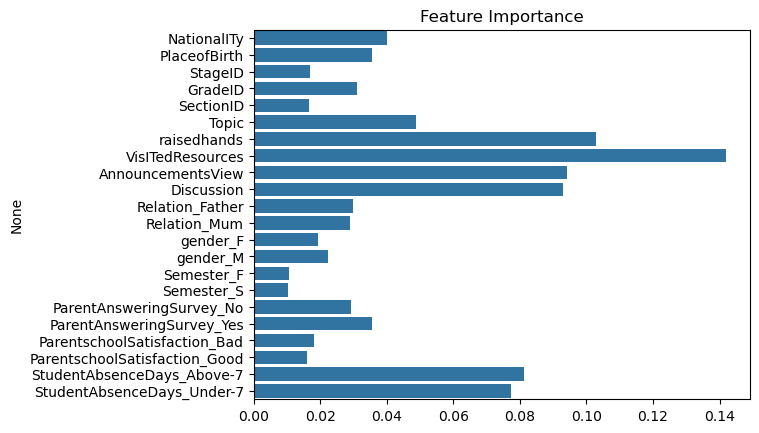

In [623]:
feature_importances = model.feature_importances_
features = X.columns

sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()

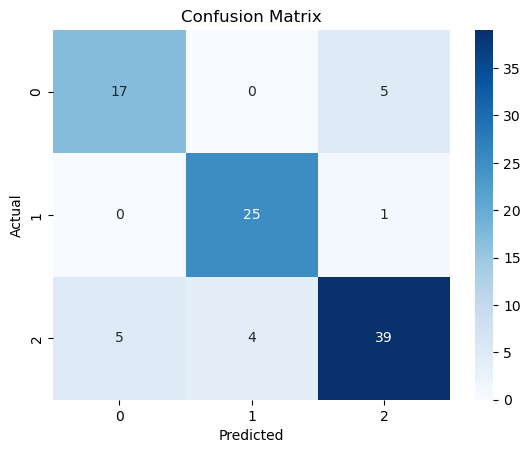

In [624]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [650]:
joblib.dump(model, 'student_performance_model.pkl')

['student_performance_model.pkl']

## Model Evaluation
Here we evaluate the trained model using metrics such as accuracy, confusion matrix, and classification report.

## Conclusion
- We analyzed student data to identify patterns and train predictive models.
- The model provides insights that can help improve educational outcomes.

Feel free to fork this notebook, experiment with other models, and share your insights!